<a href="https://colab.research.google.com/github/ryandraper/neural-network-learning/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regresssion problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [2]:
# Import a TensorFlow
import tensorflow as tf
print(tf.__version__)

2.11.0


## Creating data to view and fit


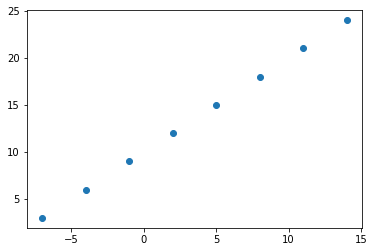

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [4]:
y ==X + 10


array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
X[1], y[1]

(-4.0, 6.0)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [10]:
X[0].ndim

0

In [11]:
X[0], y[0]

(-7.0, 3.0)

In [12]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape


(TensorShape([]), TensorShape([]))

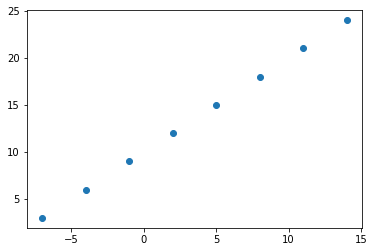

In [14]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (the function that tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evalutaion metris (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X&y (features and labels)

In [15]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model using hte Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# model.add(tf.keras.layers.Dense(1)) # other way of adding layer

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient descent)
              metrics=["mae"]
              )

#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

#

Epoch 1/5
1/1 [==============================] - 1s 874ms/step - loss: 11.1489 - mae: 11.1489
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 11.0164 - mae: 11.0164
Epoch 3/5
1/1 [==============================] - 0s 21ms/step - loss: 10.8839 - mae: 10.8839
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 10.7514 - mae: 10.7514
Epoch 5/5
1/1 [==============================] - 0s 17ms/step - loss: 10.6189 - mae: 10.6189


In [16]:
# Check out x and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Try and make a prediction using our model
y_pred = model.predict([-4])
y_pred

1/1 [==============================] - 0s 112ms/step


array([[-3.3369327]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create our model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activiation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the  **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Let's rebuild our model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

In [19]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 81ms/step


array([[29.572271]], dtype=float32)

In [ ]:
# Let's rebuild our model

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1),
])

#2. Compile the model
model.compile(loss="mae", # other way of specifying loss function
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

changing to Adam and changing the learning rate actually gave me a worse result from the videos, but I'm using a newer version of tensorflow

In [22]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [23]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 112ms/step


array([[30.108418]], dtype=float32)

Looks like even though the loss and mae is better with this model but the result isn't actually better. This may be 'overfitting'

## Evaluating a model

In practice, a typical workflow you'll go through when building a neural network is:
`Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it`

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [24]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

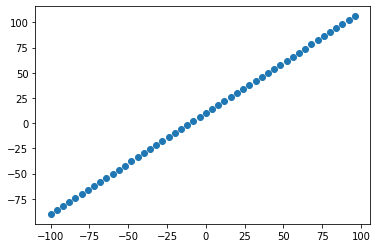

In [26]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [27]:
# Check the length of how many samples we have
len(X)

50

In [28]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samplse (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Visualizing the data

Now we've got our data in training and test sets...let's visualize it again!


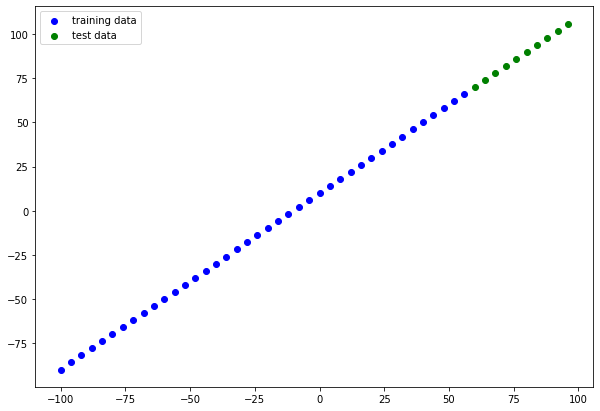

In [30]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="test data")
plt.legend()

In [31]:
# Let's have a look at how to build a neural network for our data

#1. Create the model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss="mae", 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (this time we'll train for longer)
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [32]:
### Visualizing the model
# model.summary()

ValueError: ignored

In [55]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer", activation=None),
    tf.keras.layers.Dense(1, name="output_layer")
], name="test")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

Model: "test"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains. 
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**).

📖 **Resource**: For a more in depth overview of trainable parameters within a layer, check out MITs introduction to deep learning http://introtodeeplearning.com/

🛠 **Exercise**: play around with the model definition and look at the summary output

In [56]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [57]:
# get a summary of our model
model.summary()

Model: "test"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


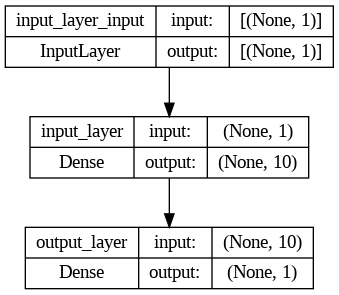

In [58]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True) 

### Visualizing our model's predictions

To visualize predictinos, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model)

In [59]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 72ms/step


array([[ 69.468994],
       [ 73.984726],
       [ 78.50046 ],
       [ 83.01618 ],
       [ 87.53192 ],
       [ 92.047646],
       [ 96.56338 ],
       [101.07911 ],
       [105.59484 ],
       [110.11057 ]], dtype=float32)

In [50]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 Note: If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to 

In [51]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b",label="Training data")
  #Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  #Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  #Show the legend
  plt.legend();

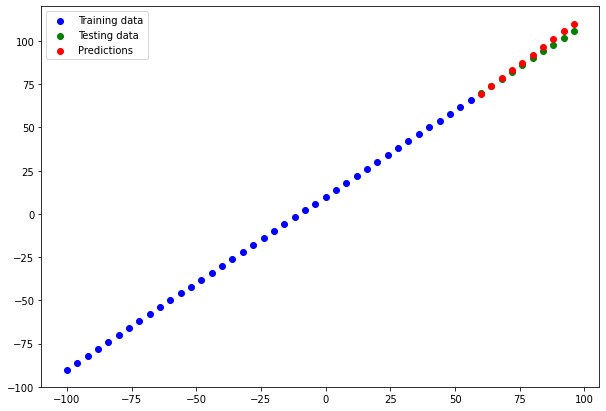

In [60]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)


### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error - "square the mean error"

In [61]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 425ms/step - loss: 1.8990 - mae: 1.8990


[1.8990364074707031, 1.8990364074707031]

In [65]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 69.468994],
       [ 73.984726],
       [ 78.50046 ],
       [ 83.01618 ],
       [ 87.53192 ],
       [ 92.047646],
       [ 96.56338 ],
       [101.07911 ],
       [105.59484 ],
       [110.11057 ]], dtype=float32)>

In [66]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.468994,  73.984726,  78.50046 ,  83.01618 ,  87.53192 ,
        92.047646,  96.56338 , 101.07911 , 105.59484 , 110.11057 ],
      dtype=float32)>

In [64]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [67]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.531006, 14.81222 , 12.199817, 10.596764, 10.      , 10.409529,
       11.825351, 14.247465, 17.675873, 22.110573], dtype=float32)>

In [69]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.8990387>

In [74]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=5.3976426>

In [84]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))


def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it ->....
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and lables).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build model_1**


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the plot_model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

1/1 [==============================] - 0s 115ms/step


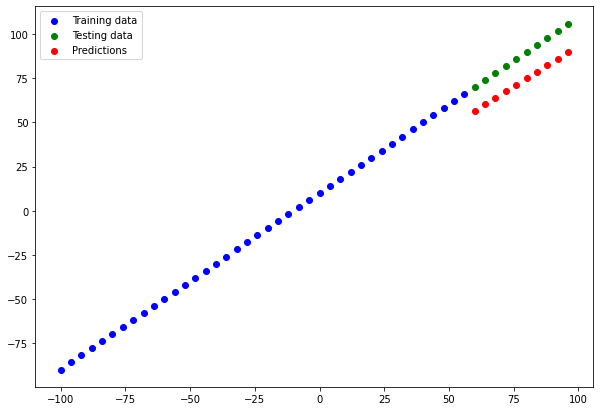

In [79]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [85]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.8473>,
 <tf.Tensor: shape=(), dtype=float32, numpy=221.26367>)

**Build model_2**

* 2 dense layers, trained for 100 epochs

In [87]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 49.0857 - mae: 49.0857
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 35.3784 - mae: 35.3784
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 39.4870 - mae: 39.4870
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 26.9933 - mae: 26.9933
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 14.7685 - mae: 14.7685
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.7846 - mae: 11.7846
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 12.8818 - mae: 12.8818
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.1321 - mae: 11.1321
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 40.7029 - mae: 40.7029
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 28.0676 - mae: 28.0676
Epoch 11/100
2/2 [==============================] - 0s 9

1/1 [==============================] - 0s 98ms/step


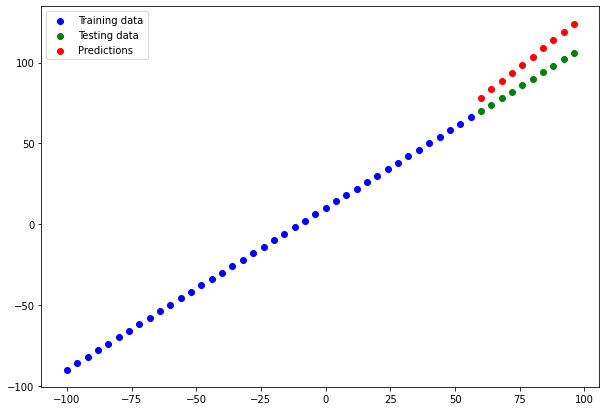

In [88]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [89]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.173355>,
 <tf.Tensor: shape=(), dtype=float32, numpy=183.47551>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [90]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 21ms/step - loss: 59.4186 - mae: 59.4186
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 27.9414 - mae: 27.9414
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 20.6294 - mae: 20.6294
Epoch 4/500
2/2 [==============================] - 0s 15ms/step - loss: 13.2653 - mae: 13.2653
Epoch 5/500
2/2 [==============================] - 0s 12ms/step - loss: 14.6600 - mae: 14.6600
Epoch 6/500
2/2 [==============================] - 0s 13ms/step - loss: 11.6895 - mae: 11.6895
Epoch 7/500
2/2 [==============================] - 0s 35ms/step - loss: 12.7601 - mae: 12.7601
Epoch 8/500
2/2 [==============================] - 0s 18ms/step - loss: 11.0770 - mae: 11.0770
Epoch 9/500
2/2 [==============================] - 0s 13ms/step - loss: 40.1116 - mae: 40.1116
Epoch 10/500
2/2 [==============================] - 0s 12ms/step - loss: 27.5509 - mae: 27.5509
Epoch 11/500
2/2 [==============================] -

1/1 [==============================] - 0s 216ms/step


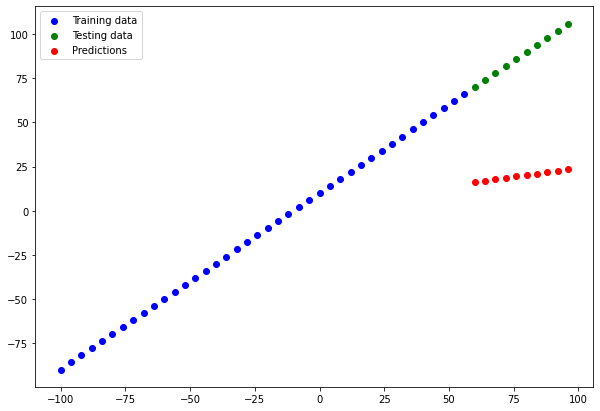

In [92]:
# Make and plot predictions of model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [93]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.158104>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4730.478>)

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We've run a few experiments, let's compare the results

In [95]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,14.847300,221.263672
1,model_2,13.173355,183.475510
2,model_3,68.158104,4730.478027


Looke like `model_2` performed the best

In [96]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work; and in turn, get close to figuing out what does work. Remember the machine learning practitioner's motto "experiment, experiment, experiment"